# Assess difference between Roberto profiles and single-peak FEH profiles

Roberto's work produced 15 options for distributing rainfall over time during an event of a particular duration.  
I have created versions of events for the Lin Dyke catchment distributed over time with each of these methods.  
Instead of running all the profiles through the model, I want to start by running the options which are most difference to the single-peaked profiles used as standard practice.  

This script therefore compares the 15 versions of the profile to the single-peaked profile. The following metrics are considered:  
* The difference in the maximum rainfall rate 
* The difference in the minute in which the maximum rainfall rate occurs 
* The RMSE between all the rainfall rates 

The comparison is made for the rainfall rate both before and after the losses are subtracted. The results are slightly different between the two:
* In both cases, clusters 11 and 12 have the greatest difference in the maximum rainfall rate (pre-loss removal cluster 12 has greatest difference, whilst greatest differnce post-loss removal is in cluster 11)
* The maximum difference in the timing of the maximum rainfall rate is in clusters 1 and 8 pre-loss removal, and in 1 and 5 post-loss removal
* In both cases, clusters 1 and 5 have the biggest difference in RMSE. The maximum rainfall rate is greatest in clusters 11 and 12 in both cases (although the greatest difference  

In [1]:
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
from Functions import *

## Read in Roberto profiles - both pre and post loss subtraction

In [2]:
cluster_numbers = list(range(1,16))
pre_loss_removal_dict = {}
post_loss_removal_dict = {}
for cluster_number in range(1,16):
    # Get the data for just this cluster and add to dictionary
    pre_loss_removal_dict[cluster_number] = pd.read_csv("PreLossRemoval/6hr_100yrRP/cluster{}.csv".format(cluster_number),
                                                  names=['minute', 'rainfall_depth_this_min'])
    post_loss_removal_dict[cluster_number] = pd.read_csv("PostLossRemoval/6hr_100yrRP/cluster{}_urban.csv".format(cluster_number))

## Read in single-peak profile (equivalent to FEH)

In [3]:
single_peak_prelossremoval = pd.read_csv("../MultiplePeaks/PreLossRemoval/6h/6h_single-peak.csv", names=['minute', 'rainfall_depth_this_min'])
single_peak_prelossremoval['minute'] = pre_loss_removal_dict[1]['minute']

## Calculate difference in max rainfall depth, minute in which the max occurs and the RMSE
Difference in timing takes the first minute in which the max rainfall rate occurs (but it will occur for a full 30 minute)

In [7]:
difference_preloss_removal = find_difference_stats(pre_loss_removal_dict, 'rainfall_depth_this_min', single_peak_prelossremoval)
difference_postloss_removal = find_difference_stats(post_loss_removal_dict, 'Total net rain mm (Observed rainfall - 01/01/2022) - urbanised model', single_peak_prelossremoval)

In [8]:
for key, difference_df in {'Pre Loss Removal: ' : difference_preloss_removal, 'Post Loss Removal: ': difference_postloss_removal}.items():
    print(key)
    find_clusters_with_max(difference_df, "max rain rate",'Max_rain_rate_diff')
    find_clusters_with_max(difference_df, "max rain rate timing",'Max_rain_rate_timing_diff')
    find_clusters_with_max(difference_df, "max rmse",'RMSE')

Pre Loss Removal: 
Max difference in max rain rate in clusters:  12 and  11
Max difference in max rain rate timing in clusters:  1 and  8
Max difference in max rmse in clusters:  1 and  5
Post Loss Removal: 
Max difference in max rain rate in clusters:  11 and  12
Max difference in max rain rate timing in clusters:  5 and  1
Max difference in max rmse in clusters:  1 and  5


## Plot profiles, with the most different ones highlighted

In [9]:
pre_loss_removal_dict['single-peak'] = single_peak_prelossremoval

Text(0.09, 0.5, 'Depth (mm)')

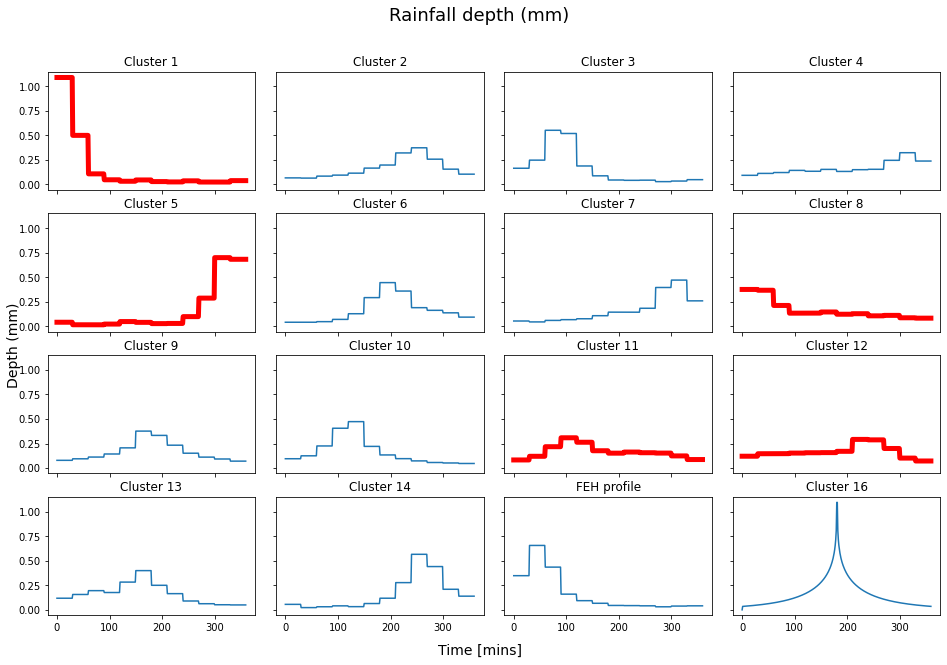

In [11]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize =(16,10), sharey=True, sharex = True)
plt.subplots_adjust(wspace=0.1)
fig.suptitle("Rainfall depth (mm)", fontsize=18, y=0.97)

# loop through tickers and axes
for num, (cluster_num, clusters_rainfall_data)in enumerate(pre_loss_removal_dict.items()):
    ax = axs.ravel()[num]
    num = num +1
    if num in [12,11,1,5,8]:
        ax.plot(clusters_rainfall_data['minute'], clusters_rainfall_data['rainfall_depth_this_min'], linewidth =5, color = 'red' )   
    else:
        ax.plot(clusters_rainfall_data['minute'], clusters_rainfall_data['rainfall_depth_this_min'])      
    
    if num == 15:
        ax.set_title("FEH profile")
    else:
        ax.set_title("Cluster {}".format(num))
fig.text(0.5, 0.07, 'Time [mins]', ha='center', fontsize =14)
fig.text(0.09, 0.5, "Depth (mm)", va='center', rotation='vertical', fontsize =14)